In [3]:
import csv 
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sqlalchemy import create_engine
from bubbly.bubbly import bubbleplot 
from plotly.offline import init_notebook_mode, iplot


In [4]:
data2015 = pd.read_csv("2015.csv")
data2016 = pd.read_csv("2016.csv")
data2017 = pd.read_csv("2017.csv")
data2018 = pd.read_csv("2018.csv")
data2019 = pd.read_csv("2019.csv")

In [5]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data2019.columns = ["Rank","Country","Happiness Score",
                  "GDP Per Capita","Family Support","Life Expectancy",
                 "Freedom of Life Choices","Generosity","Perceptions of Corruption"]

data2018.columns = ["Rank","Country","Happiness Score",
                  "GDP Per Capita","Family Support","Life Expectancy",
                 "Freedom of Life Choices","Generosity","Perceptions of Corruption"]

data2017.drop(["Whisker.high","Whisker.low",
               "Dystopia.Residual"],axis=1,inplace=True)
data2017.columns = ["Country","Rank","Happiness Score",
                  "GDP Per Capita","Family Support", "Life Expectancy",
                 "Freedom of Life Choices","Generosity","Perceptions of Corruption"]

data2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            'Dystopia Residual'],axis=1,inplace=True)
data2016.columns = ["Country","Rank","Happiness Score",
                  "GDP Per Capita","Family Support","Life Expectancy",
                 "Freedom of Life Choices","Generosity","Perceptions of Corruption"]

data2015.drop(["Region",'Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
data2015.columns = ["Country","Rank","Happiness Score",
                  "GDP Per Capita","Family Support","Life Expectancy",
                 "Freedom of Life Choices","Generosity","Perceptions of Corruption"]



In [12]:
data2015["Year"] = 2015
data2016["Year"] = 2016
data2017["Year"] = 2017
data2018["Year"] = 2018
data2019["Year"] = 2019
data2015.head()

,Country,Rank,Happiness Score,GDP Per Capita,Family Support,Life Expectancy,Freedom of Life Choices,Generosity,Perceptions of Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [13]:
happiness_df = data2015.append([data2016,data2017,data2018,data2019])
happiness_df.head()

,Country,Rank,Happiness Score,GDP Per Capita,Family Support,Life Expectancy,Freedom of Life Choices,Generosity,Perceptions of Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [17]:
happiness_df.dropna(inplace=True)
happiness_df

,Country,Rank,Happiness Score,GDP Per Capita,Family Support,Life Expectancy,Freedom of Life Choices,Generosity,Perceptions of Corruption,Year,Lat,Long
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,46.818188,8.227512
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,64.963051,-19.020835
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,56.263920,9.501785
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,60.472024,8.468946
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,56.130366,-106.346771
...,...,...,...,...,...,...,...,...,...,...,...,...
775,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,2019,15.552727,48.516388
776,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019,-1.940278,29.873888
777,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019,-6.369028,34.888822
778,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019,33.939110,67.709953


In [15]:
coords = pd.read_csv("coords.csv")
coords.drop(["country"],axis=1,inplace=True)
coords.columns = ["Lat", "Long", "Country"]
coords.head()

,Lat,Long,Country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [16]:
happiness_df = pd.merge(left=happiness_df, right=coords, how='left', left_on='Country', right_on='Country')
happiness_df

,Country,Rank,Happiness Score,GDP Per Capita,Family Support,Life Expectancy,Freedom of Life Choices,Generosity,Perceptions of Corruption,Year,Lat,Long
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,46.818188,8.227512
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,64.963051,-19.020835
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,56.263920,9.501785
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,60.472024,8.468946
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,56.130366,-106.346771
...,...,...,...,...,...,...,...,...,...,...,...,...
776,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019,-1.940278,29.873888
777,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019,-6.369028,34.888822
778,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019,33.939110,67.709953
779,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019,6.611111,20.939444


In [10]:
happiness_df.to_csv(r'data.csv')

In [14]:
def make_json(csvFilePath, jsonFilePath):  
    data = {} 
      
    with open(csvFilePath, encoding='utf-8') as csvf: 
        csvReader = csv.DictReader(csvf) 
          
        for rows in csvReader: 
            key = rows['Country'] 
            data[key] = rows 
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonf.write(json.dumps(data, indent=4)) 
          
csvFilePath = r'data.csv'
jsonFilePath = r'data.json'
  
make_json(csvFilePath, jsonFilePath)


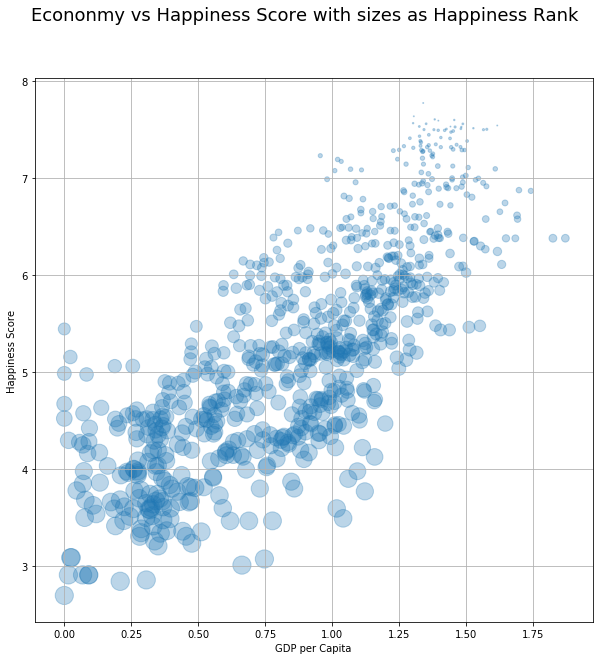

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(happiness_df['GDP Per Capita'], happiness_df['Happiness Score'], s=(happiness_df['Rank']** 1.15), alpha=0.3)
plt.grid(True)

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")

plt.suptitle("Economy vs Happiness Score with sizes as Happiness Rank", fontsize=18)

plt.show()